Sentiment Analysis


In [76]:
from google.colab import files


uploaded = files.upload()


Saving hp_printer_droppedduplicates.csv to hp_printer_droppedduplicates (1).csv


In [77]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['hp_printer_droppedduplicates.csv']))
print(df)


                                                 Tweets
0     Today I bought two ink cartridges for my HP pr...
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...
2     https://t.co/v5qSSxjMU2\n\nStep-by-Step Guide:...
3     befon 207A W2210A Compatible for HP 207A for H...
4     With our high-performance toner cartridges, yo...
...                                                 ...
1133  HINICOLE 301XL New Ink Cartridge For HP301 Car...
1134  @alexfeinberg1 Agree with Alexander. Switched ...
1135  For HP 728 728XL New Upgrade Cartridge Chip F9...
1136  HP 685 Ink Cartridge - Black - Tinta Printer (...
1137  HP 2776 DeskJet Ink Advantage All-in-One Print...

[1138 rows x 1 columns]


In [78]:
#removal of links

import re
df['cleanLinks'] = df['Tweets'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [79]:
print(df)

                                                 Tweets  \
0     Today I bought two ink cartridges for my HP pr...   
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...   
2     https://t.co/v5qSSxjMU2\n\nStep-by-Step Guide:...   
3     befon 207A W2210A Compatible for HP 207A for H...   
4     With our high-performance toner cartridges, yo...   
...                                                 ...   
1133  HINICOLE 301XL New Ink Cartridge For HP301 Car...   
1134  @alexfeinberg1 Agree with Alexander. Switched ...   
1135  For HP 728 728XL New Upgrade Cartridge Chip F9...   
1136  HP 685 Ink Cartridge - Black - Tinta Printer (...   
1137  HP 2776 DeskJet Ink Advantage All-in-One Print...   

                                             cleanLinks  
0     Today I bought two ink cartridges for my HP pr...  
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...  
2                                                        
3     befon 207A W2210A Compatible for HP 207A for H...  
4

In [80]:
# Remove the duplicate rows
unique_tweets = df.drop_duplicates()

# Write the unique tweets to a new CSV file
unique_tweets.to_csv("unique_tweets.csv", index=False)

In [81]:
from google.colab import files


uploaded = files.upload()

Saving updated_tweets.csv to updated_tweets (1).csv


In [82]:
updated_tw = pd.read_csv(io.BytesIO(uploaded['updated_tweets.csv']))
print(updated_tw)

                                                 Tweets
0     Today I bought two ink cartridges for my HP pr...
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...
2     befon 207A W2210A Compatible for HP 207A for H...
3     With our high-performance toner cartridges, yo...
4     OFFER: HP photosmart C4272 printer, copier, sc...
...                                                 ...
997   @GAFGRM Thank you for reaching out to HP Suppo...
998   My HP all in one won't work since moving. I ge...
999   @alexfeinberg1 Agree with Alexander. Switched ...
1000  HP 685 Ink Cartridge - Black - Tinta Printer (...
1001  HP 2776 DeskJet Ink Advantage All-in-One Print...

[1002 rows x 1 columns]


Removing  any mentions/ hashtags

In [83]:
updated_tw["Tweets"] = updated_tw["Tweets"].apply(lambda x: re.sub("#\w+|@\w+", "", x))

In [84]:
print(updated_tw)

                                                 Tweets
0     Today I bought two ink cartridges for my HP pr...
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...
2     befon 207A W2210A Compatible for HP 207A for H...
3     With our high-performance toner cartridges, yo...
4     OFFER: HP photosmart C4272 printer, copier, sc...
...                                                 ...
997    Thank you for reaching out to HP Support!\nWe...
998   My HP all in one won't work since moving. I ge...
999    Agree with Alexander. Switched to a Brother l...
1000  HP 685 Ink Cartridge - Black - Tinta Printer (...
1001  HP 2776 DeskJet Ink Advantage All-in-One Print...

[1002 rows x 1 columns]


removing punctuations

In [85]:
updated_tw["Tweets"] = updated_tw["Tweets"].apply(lambda x: x.replace(r"[^\w\s]", ""))
print(updated_tw)

                                                 Tweets
0     Today I bought two ink cartridges for my HP pr...
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...
2     befon 207A W2210A Compatible for HP 207A for H...
3     With our high-performance toner cartridges, yo...
4     OFFER: HP photosmart C4272 printer, copier, sc...
...                                                 ...
997    Thank you for reaching out to HP Support!\nWe...
998   My HP all in one won't work since moving. I ge...
999    Agree with Alexander. Switched to a Brother l...
1000  HP 685 Ink Cartridge - Black - Tinta Printer (...
1001  HP 2776 DeskJet Ink Advantage All-in-One Print...

[1002 rows x 1 columns]


In [73]:
updated_tw.to_csv("clean_tweets.csv", index=False)

In [87]:
updatedcopy = updated_tw.copy()

In [88]:
print(updatedcopy)

                                                 Tweets
0     Today I bought two ink cartridges for my HP pr...
1     Einkshop 65XL Ink Cartridge Compatible for Hp ...
2     befon 207A W2210A Compatible for HP 207A for H...
3     With our high-performance toner cartridges, yo...
4     OFFER: HP photosmart C4272 printer, copier, sc...
...                                                 ...
997    Thank you for reaching out to HP Support!\nWe...
998   My HP all in one won't work since moving. I ge...
999    Agree with Alexander. Switched to a Brother l...
1000  HP 685 Ink Cartridge - Black - Tinta Printer (...
1001  HP 2776 DeskJet Ink Advantage All-in-One Print...

[1002 rows x 1 columns]


Removing Short Words

In [91]:
updatedcopy["Tweets"] = updatedcopy["Tweets"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Lower case conversion

In [93]:
updatedcopy["Tweets"] = updatedcopy["Tweets"].apply(lambda x: x.lower())

In [95]:
tokenized_tweet = updatedcopy["Tweets"].apply(lambda x: x.split())

In [97]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
# stemming
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

In [99]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
updatedcopy["Tweets"] = tokenized_tweet

In [100]:
tokenized_tweet.head()

0    today bought cartridg printer, colour don't wo...
1    einkshop 65xl cartridg compat hp65 envi 5010 5...
2    befon 207a w2210a compat 207a laser m283fdw 21...
3    with high-perform toner cartridges, unlock you...
4    offer: photosmart c4272 printer, copier, scann...
Name: Tweets, dtype: object

In [101]:
updatedcopy.to_csv("tweets.csv", index=False)

In [102]:
print(updatedcopy)

                                                 Tweets
0     today bought cartridg printer, colour don't wo...
1     einkshop 65xl cartridg compat hp65 envi 5010 5...
2     befon 207a w2210a compat 207a laser m283fdw 21...
3     with high-perform toner cartridges, unlock you...
4     offer: photosmart c4272 printer, copier, scann...
...                                                 ...
997   thank reach support! we'r sorri inconvenience!...
998   won't work sinc moving. error printer cartridg...
999   agre with alexander. switch brother laserjet p...
1000     cartridg black tinta printer (cz121aa) omxvzlk
1001  2776 deskjet advantag all-in-on printer (print...

[1002 rows x 1 columns]


In [103]:
from wordcloud import WordCloud 

In [104]:
import matplotlib.pyplot as plt 

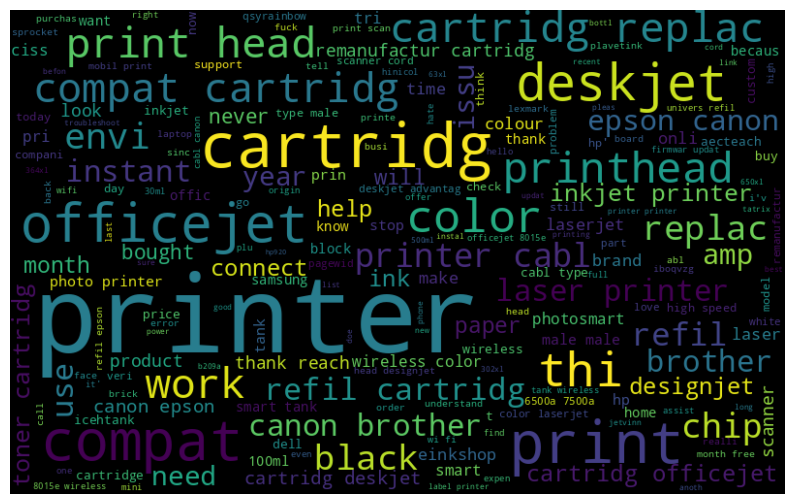

In [105]:
all_words = ' '.join([text for text in updatedcopy["Tweets"]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()